# The aim of this notebooks is to provide exploratory data analysis

In [15]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Statistical libraries
from scipy import stats
from statsmodels.graphics import tsaplots

# utilities
import sys
import nltk
sys.path.append('modules')
import utils

In [9]:
# Basic Environment setup
plt.rcParams['figure.figsize'] = (15,5)

# Make pandas display all columns
pd.set_option("display.max_columns", None)

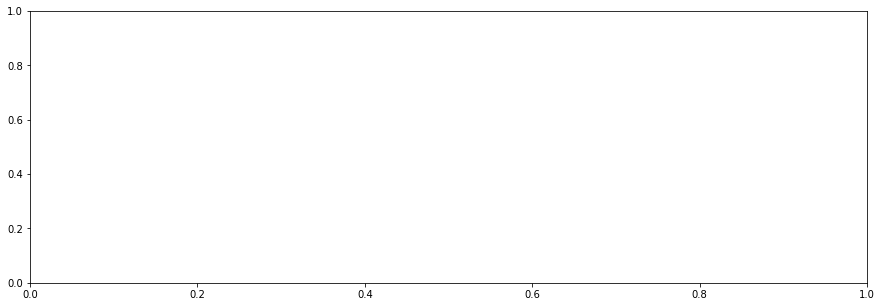

In [10]:
fig,ax=plt.subplots()

rect = fig.patch
rect.set_facecolor("white")

## Downloading Data

In [32]:
bitcoin = utils.get_data('BTCUSDT', exchange = 'BINANCE',start_date = "2020-01-01")
twitter_daily = pd.read_pickle('../data/cleaned/by_date_verified_sentiments_2020-2021.pkl')
merged_df = bitcoin.merge(twitter_daily, how = 'outer', left_on = 'datetime', right_on = 'created_at')

In [33]:
merged_df.head()

,datetime,symbol,open,high,low,close,volume,created_at,weighted_sentiment
0,2020-01-01,BINANCE:BTCUSDT,7200.77,7212.50,6924.74,6965.71,31951.483932,2020-01-01,0.137061
1,2020-01-02,BINANCE:BTCUSDT,6965.49,7405.00,6871.04,7344.96,68428.500451,2020-01-02,0.080472
2,2020-01-03,BINANCE:BTCUSDT,7345.00,7404.00,7272.21,7354.11,29987.974977,2020-01-03,0.120766
3,2020-01-04,BINANCE:BTCUSDT,7354.19,7495.00,7318.00,7358.75,38331.085604,2020-01-04,0.062771
4,2020-01-05,BINANCE:BTCUSDT,7357.64,7795.34,7346.76,7758.00,54635.695316,2020-01-05,0.062458


## Exploratory Data Analysis

In [34]:
merged_df.describe()

,open,high,low,close,volume,weighted_sentiment
count,789.000000,789.000000,789.000000,789.000000,789.000000,731.000000
mean,30086.629518,30962.871432,29095.608251,30130.438631,68123.816451,0.108371
std,19184.509785,19723.093043,18541.026256,19171.658640,38715.044158,0.038179
min,4800.010000,5365.420000,3782.130000,4800.000000,17731.834010,-0.106013
25%,9910.700000,10188.000000,9700.000000,9931.540000,43830.254467,0.087980
50%,33368.180000,34500.000000,31910.000000,33380.810000,58255.645004,0.111573
75%,47103.280000,48424.110000,45900.000000,47111.520000,82616.343993,0.131138
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,0.216091


- We observe that the mean of sentiment is 0.1 and is not 0. In fact, the sentiment is skewed to the left

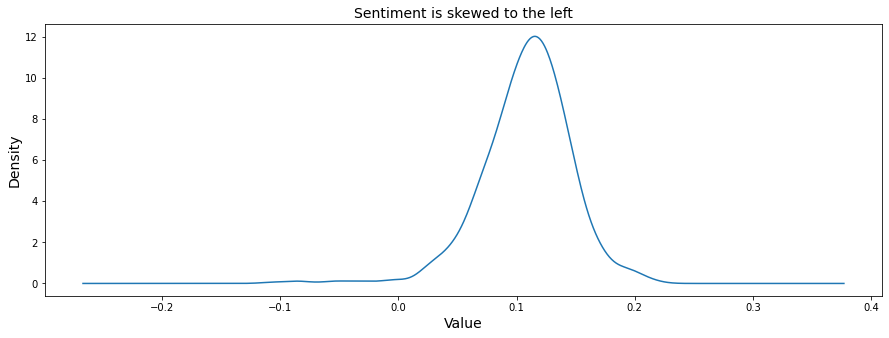

In [35]:

merged_df['weighted_sentiment'].plot.density()

plt.title("Sentiment is skewed to the left", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.xlabel("Value", fontsize = 14)

plt.savefig('figures/sentiment_distribution.png', bbox_inches='tight', pad_inches=0.1,facecolor = rect.get_facecolor())

- We observe that price of Bitcoin has historically been increasing withle the trading volume has not.

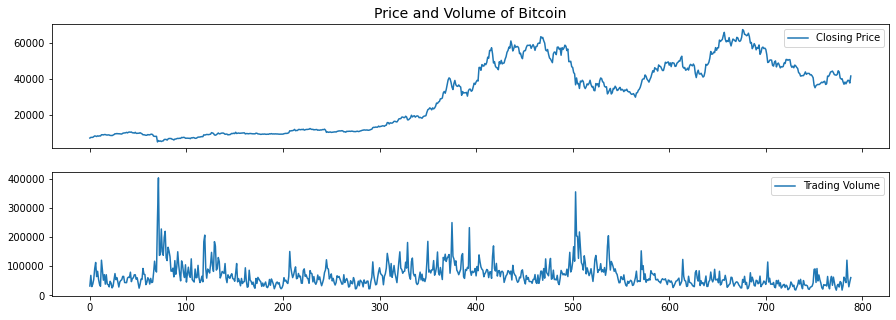

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)

ax1.plot(merged_df['close'], label = "Closing Price")
ax2.plot(merged_df['volume'], label = "Trading Volume")

ax1.set_title("Price and Volume of Bitcoin", fontsize = 14)
ax1.legend()
ax2.legend()

plt.savefig('figures/price_and_volume.png', bbox_inches='tight', pad_inches=0.1,facecolor = rect.get_facecolor())

- Let us check independence of the closing price - clearly, close prices are highly correlated

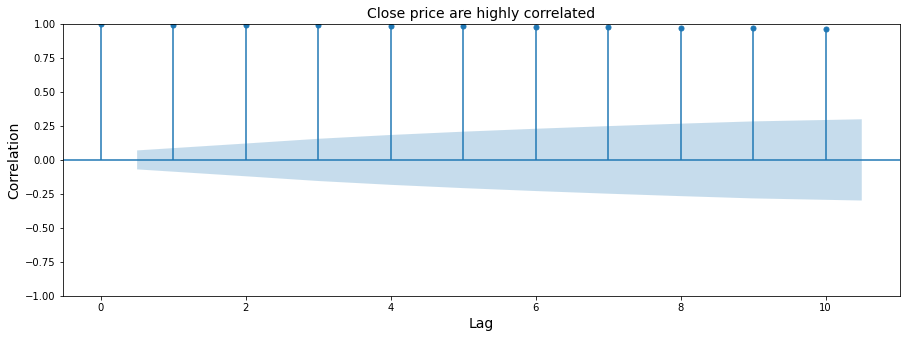

<Figure size 1080x360 with 0 Axes>

In [53]:
fig = tsaplots.plot_acf(merged_df['close'], lags=10)
plt.title("Close price are highly correlated",  fontsize = 14)
plt.ylabel("Correlation",  fontsize = 14)
plt.xlabel("Lag",  fontsize = 14)

plt.show()
plt.savefig('figures/autocorrelation.png', bbox_inches='tight', pad_inches=0.1,facecolor = rect.get_facecolor())

- Autocorrelation of returns is significanlty lower for close price return. This is more approriate for linear regressions as the dependent variable is supposed to be independent from one another.

In [54]:
for i in range(1, 10):
    merged_df['close_return_'+str(i)] = utils.calculate_return(merged_df, ['close'], i)['close_return']

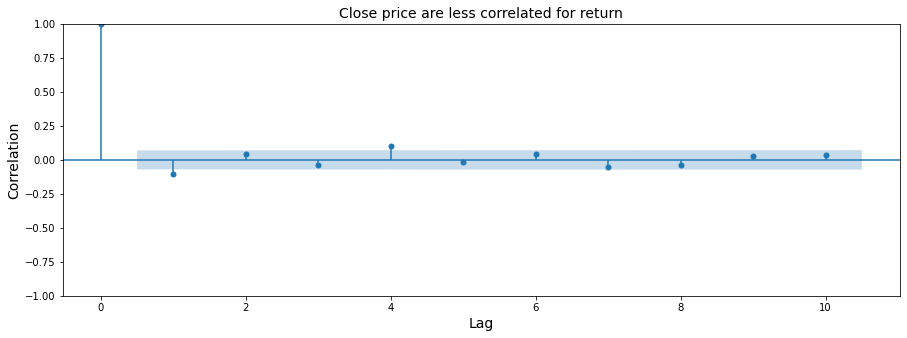

<Figure size 1080x360 with 0 Axes>

In [56]:
fig = tsaplots.plot_acf(merged_df['close_return_1'].dropna(), lags=10)
plt.title("Close price are less correlated for return",  fontsize = 14)
plt.ylabel("Correlation",  fontsize = 14)
plt.xlabel("Lag",  fontsize = 14)

plt.show()
plt.savefig('figures/autocorrelation_1_day_return.png', bbox_inches='tight', pad_inches=0.1,facecolor = rect.get_facecolor())

In [58]:
merged_df['close_return_1'].describe()

count    788.000000
mean       0.003125
std        0.040570
min       -0.395048
25%       -0.015611
50%        0.002596
75%        0.021750
max        0.195361
Name: close_return_1, dtype: float64

Text(0.5, 0, 'Value')

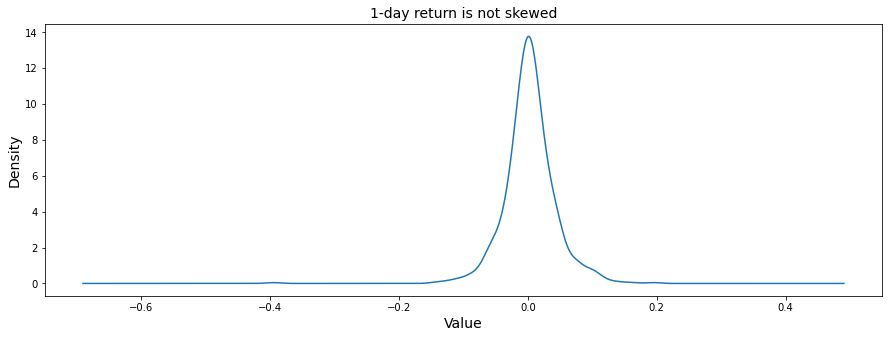

In [60]:
merged_df['close_return_1'].plot.density()

plt.title("1-day return is not skewed", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.xlabel("Value", fontsize = 14)

#plt.savefig('figures/.png', bbox_inches='tight', pad_inches=0.1,facecolor = rect.get_facecolor())

- We now assess the correlation between return and sentiment